## Viewer notebook specifically built for results from toy models
## Updated: May 7 2023

In [34]:
import os
os.chdir('/Users/haozheshan/Dropbox/codes/gp_continual_learning/')
import numpy as np
import matplotlib.pyplot as plt
import theory, cluster_utils, torch, data, utils

%load_ext autoreload
%autoreload 2

# USE KEYWORDS BELOW TO SEARCH FOR FOLDERS
batch_name_list =cluster_utils.list_folders('cluster_results/', '', 'diff_strength')

#################
folder_index = 1
#################
organizer = cluster_utils.ClusterResultOrganizer('cluster_results/', batch_name=batch_name_list[folder_index], sort_by_key=None)

num_keys, tr_loss_arr = organizer.organize_results('train loss', as_arrays=True)
num_keys, te_loss_arr = organizer.organize_results('test loss', as_arrays=True)
_, tr_mag_arr = organizer.organize_results('train magnitude', as_arrays=True)
_, m_tau_arr = organizer.organize_results('M tau', as_arrays=True)
_, a_tau_arr = organizer.organize_results('A tau', as_arrays=True)
_, m_asym_arr = organizer.organize_results('M asym', as_arrays=True)
_, a_asym_arr = organizer.organize_results('A asym', as_arrays=True)
_, trp1p2_arr = organizer.organize_results('tr(P1P2)/P', as_arrays=True)
_, v1_v2_arr = organizer.organize_results('V1-V2', as_arrays=True)

two_task_loss = tr_loss_arr.mean(1)[:, 0, 1]
two_task_loss_te = te_loss_arr.mean(1)[:, 0, 1]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Generating a list at 2023-05-27 22:21
[0] gp_5x500_fashion_split_10context_1L_diff_strength
[1] gp_5x500_fashion_split_10context_5L_diff_strength
[2] gp_5x500_fashion_split_10context_3L_diff_strength
[3] gp_5x500_mnist_split_10context_5L_diff_strength
[4] gp_5x500_mnist_split_10context_3L_diff_strength
[5] gp_5x500_mnist_split_10context_1L_diff_strength
No key was specified. Automatically using key <<context_strength>> to sort the results.
=================== Cluster organizer ===================
420 data objects loaded from folder "gp_5x500_fashion_split_10context_5L_diff_strength".
For key <<context_strength>>, the values are [125, 25, 375, 100, 450, 475, 500, 0, 300, 400, 150, 175, 275, 75, 50, 250, 200, 325, 425, 350, 225]
=================== Cluster organizer ===================
Available data keys are dict_keys(['args', 'train loss', 'test loss', 'train acc', 'test acc', 'train magnitude', 'Vt

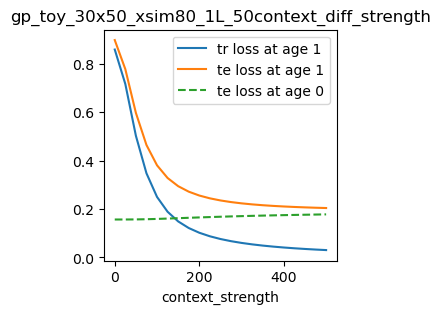

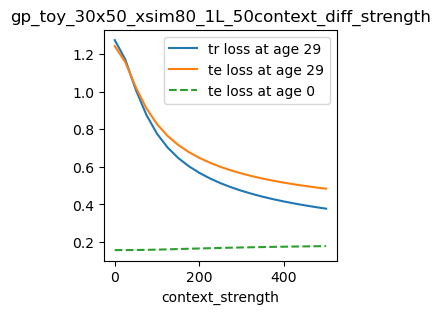

In [30]:
plt.figure(figsize=(3, 3))
plt.plot(num_keys, two_task_loss, label='tr loss at age 1')
plt.plot(num_keys, two_task_loss_te, label='te loss at age 1')
plt.plot(num_keys, te_loss_arr.mean(1)[:, 0, 0], label='te loss at age 0', ls='--')
plt.xlabel(organizer.sort_by_key)
plt.title(batch_name_list[folder_index])
plt.legend()

plt.figure(figsize=(3, 3))
plt.plot(num_keys, tr_loss_arr.mean(1)[:, 0, -1], label='tr loss at age 29')
plt.plot(num_keys, te_loss_arr.mean(1)[:, 0, -1], label='te loss at age 29')
plt.plot(num_keys, te_loss_arr.mean(1)[:, 0, 0], label='te loss at age 0', ls='--')
plt.xlabel(organizer.sort_by_key)
plt.title(batch_name_list[folder_index])
plt.legend()

## Plot loss over time for different parameters; do exponential fits

IndexError: index 12 is out of bounds for axis 0 with size 12

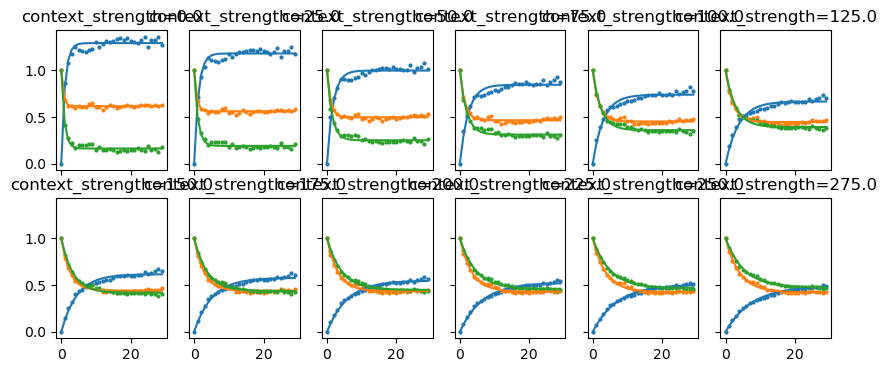

In [27]:
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(10, 4), sharex=True, sharey=True)
axes = axes.ravel()

m_tau_fitted = organizer.organize_results('M tau')

for i in range(len(num_keys)):
    plt.sca(axes[i])
    L = tr_loss_arr[i].mean(0)[0]
    M = tr_mag_arr[i].mean(0)[0]
    A = (L - 1 - M) * -0.5
    _ = utils.plot_and_exp_fit(L, label='loss', r_and_gain=False)
    _ = utils.plot_and_exp_fit(M, label='Mag', r_and_gain=False)
    _ = utils.plot_and_exp_fit(A, label='Align', r_and_gain=False)
    plt.title(f'{organizer.sort_by_key}={num_keys[i]}')
    
    # plt.xlabel('age of task 1')
# plt.legend(['L', None, 'M', None, 'A', None])
plt.sca(axes[0])
plt.legend()
plt.suptitle(f'{batch_name_list[folder_index]}')
plt.tight_layout()

## Plot OPs as a function of the independent variable

Text(0.5, 1.0, 'gp_toy_30x50_xsim80_1L_50context_diff_strength')

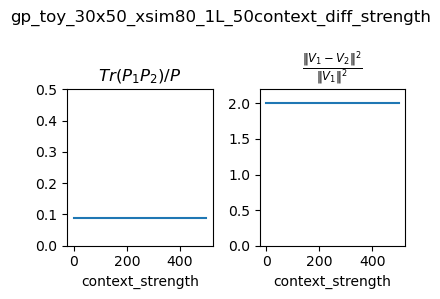

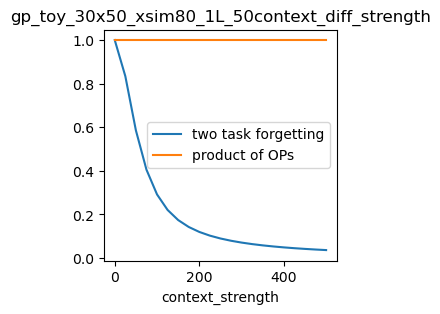

In [28]:
xlabel = organizer.sort_by_key
_, axes = plt.subplots(figsize=(4, 3), ncols=2, nrows=1)
axes = axes.ravel()
plt.sca(axes[0])
plt.plot(num_keys, trp1p2_arr.mean(1))
plt.xlabel(xlabel)
plt.title('$Tr(P_1 P_2)/P$')
plt.ylim(0, 0.5)
# plt.ylabel('$V_1^T V_2$ normalized')

plt.sca(axes[1])
plt.plot(num_keys, v1_v2_arr.mean(1))
plt.ylim(0, 2.2)
plt.xlabel(xlabel)
plt.title('$\\frac{\Vert V_1 - V_2 \Vert^2}{\Vert V_1 \Vert^2}$')
plt.suptitle(batch_name_list[folder_index])
plt.tight_layout()

prod_of_ops = (trp1p2_arr * v1_v2_arr).mean(1)
plt.figure(figsize=(3, 3))
# plt.plot(num_keys, two_task_loss, label='two task forgetting')
# plt.plot(num_keys, prod_of_ops, label='product of OPs')
plt.plot(num_keys, two_task_loss / two_task_loss[0], label='two task forgetting')
plt.plot(num_keys, prod_of_ops / prod_of_ops[0], label='product of OPs')
plt.legend()
plt.xlabel(xlabel)
plt.title(batch_name_list[folder_index])


## Plot long-term-forgetting parameters as a function of the independent variable

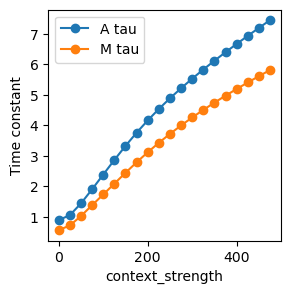

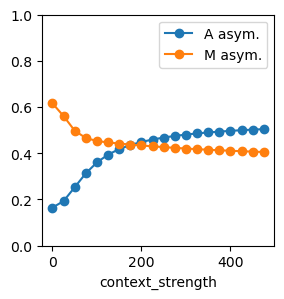

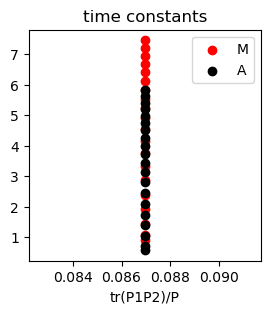

In [31]:
plt.figure(figsize=(3, 3))
plt.plot(num_keys[:-1], a_tau_arr[:-1], marker='o', label='A tau')
plt.plot(num_keys[:-1], m_tau_arr[:-1], marker='o', label='M tau')
plt.ylabel('Time constant')
plt.legend()
plt.xlabel(organizer.sort_by_key)

plt.figure(figsize=(3, 3))
plt.plot(num_keys[:-1], a_asym_arr[:-1], marker='o', label='A asym.')
plt.plot(num_keys[:-1], m_asym_arr[:-1], marker='o', label='M asym.')
plt.ylim(0, 1)
plt.legend()
plt.xlabel(organizer.sort_by_key)

plt.figure(figsize=(3, 3))
plt.scatter(trp1p2_arr.mean(1)[:-1], a_tau_arr[:-1], c='r', label='M')
plt.scatter(trp1p2_arr.mean(1)[:-1], m_tau_arr[:-1], c='k', label='A')
plt.xlabel('tr(P1P2)/P')
plt.title('time constants')
plt.legend()

### Compute some OPs from data
These are the OPs being computed:

`v1v2`: This is $V_1 ^T V_2 / V_1 ^T V_1$

`v1_minus_v2`: This is $\frac{\lVert V_1 - V-2 \rVert^2}{ \lVert V_1 \rVert^2}$

`p1p2`: This is $Tr(P_1 P_2)/Tr(P_1)$

`p1S2p1`: This is $Tr(P_2 \Sigma_1 P_2)/Tr(\Sigma_1)$. $Tr{\Sigma_1}$ is estimated from $Tr(K_1)$.

In [19]:
nseeds = 100
sim_n_values = len(num_keys)

change_var = organizer.sort_by_key
# below are the default values
tsim = organizer.args.tsim
xsim = organizer.args.xsim
depth = organizer.args.depth

v1v2_arr = np.zeros((nseeds, sim_n_values))
v1_minus_v2_arr = np.zeros((nseeds, sim_n_values))
v2_minus_p2v1_arr = np.zeros((nseeds, sim_n_values))
p1p2_arr = np.zeros((nseeds, sim_n_values))
p1S2p1_arr = np.zeros((nseeds, sim_n_values))
v1p2p1v2_arr = np.zeros((nseeds, sim_n_values))
v1S1v2_arr = np.zeros((nseeds, sim_n_values))
S1S2_arr = np.zeros((nseeds, sim_n_values))
v1p2S1v1_arr = np.zeros((nseeds, sim_n_values))
v2s1v2_arr = np.zeros((nseeds, sim_n_values))
k1k2inv_arr = np.zeros((nseeds, sim_n_values))

for i in range(sim_n_values):

    for seed in range(nseeds):
        torch.manual_seed(seed)

        seq_of_train_x, _, seq_of_train_y, _ =\
                data.prepare_cluster_dataset(num_tasks=2,
                                            train_p=50,
                                            test_p=2,
                                            num_clusters=10,
                                            input_dim=100,
                                            hidden_dim=100,
                                            relative_radius=0.1,
                                            teacher_similarity=num_keys[i] if change_var == 'tsim' else tsim,
                                            input_similarity=num_keys[i] if change_var == 'xsim' else xsim,
                                            accumulate=False,
                                            precision=64)
        
        k1 = theory.k_ntk(seq_of_train_x[0], seq_of_train_x[0], depth=num_keys[i] if change_var == 'depth' else depth)
        k2 = theory.k_ntk(seq_of_train_x[1], seq_of_train_x[1], depth=num_keys[i] if change_var == 'depth' else depth)
        k12 = theory.k_ntk(seq_of_train_x[0], seq_of_train_x[1], depth=num_keys[i] if change_var == 'depth' else depth)
        k1_inv = torch.inverse(k1)
        k2_inv = torch.inverse(k2)

        y1 = seq_of_train_y[0]
        y2 = seq_of_train_y[1]
        v1_norm_sq = float(y1.T @ k1_inv @ y1)
        v1p2_norm_sq = float(y1.T @ k1_inv @ k12 @ k2_inv @ k12.T @ k1_inv @ y1)
        v1v2 = float(y1.T @ k1_inv @ k12 @ k2_inv @ y2)
        v1p2p1v2 = float(y1.T @ k1_inv @ k12 @ k2_inv @ k12.T @ k1_inv @ k12 @ k2_inv @ y2)

        v1v2_arr[seed, i] = v1v2 / v1_norm_sq
        v1_minus_v2_arr[seed, i] = 2 - 2 * v1v2_arr[seed, i]
        p1p2_arr[seed, i] = float(torch.trace(k1_inv @ k12 @ k2_inv @ k12.T)) / 50
        p1S2p1_arr[seed, i] = float(torch.trace(k1_inv @ k12 @ k12.T)) / float(torch.trace(k1))
        v1p2p1v2_arr[seed, i] = v1p2p1v2 / v1_norm_sq
        v2_minus_p2v1_arr[seed, i] = 1 + v1p2_norm_sq / v1_norm_sq - 2 * v1v2_arr[seed, i]
        v1S1v2_arr[seed, i] = float(y1.T @ k1_inv @ k12 @ k2_inv @ y2)
        v1p2S1v1_arr[seed, i] = float(y1.T @ k1_inv @ k12 @ k2_inv @ k12.T @ y1)
        S1S2_arr[seed, i] = float(torch.trace(k12 @ k12.T) / torch.trace(k1))
        v2s1v2_arr[seed, i ] = float(y2.T @ k2_inv @ k12.T @ k12 @ k2_inv @ y2)
        k1k2inv_arr[seed, i] = float(torch.trace(k1 @ k2_inv) / k1.shape[0])


/Users/haozheshan/Dropbox/codes/gp_continual_learning/theory.py:247: UserWarning: arccosine kernel computation is assuming that all inputs have the same norm.
  warnings.warn('arccosine kernel computation is assuming that all inputs have the same norm.')


## Plot OPs as a function of the independent variable

NameError: name 'all_keys' is not defined

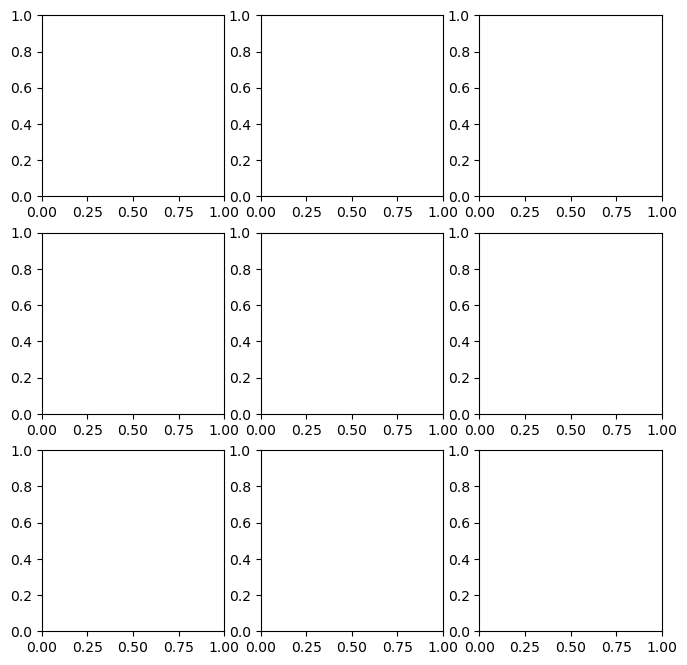

In [24]:
# The code below plots different potential OPs 
_, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.ravel()
plt.sca(axes[0])


plt.sca(axes[1])
plt.plot(all_keys, p1S2p1_arr.mean(0))
plt.xlabel('depth')
plt.title('tr(p1s2p1)/(tr(p1))')

plt.sca(axes[2])
plt.plot(all_keys, v1p2p1v2_arr.mean(0))
plt.xlabel('depth')
plt.title('v1p2p1v2')

plt.sca(axes[3])
plt.plot(all_keys, v2_minus_p2v1_arr.mean(0))
plt.xlabel('depth')
plt.title('v2-p2v1')

plt.sca(axes[4])
plt.plot(all_keys, S1S2_arr.mean(0))
plt.xlabel('depth')
plt.title('S1S2')

plt.sca(axes[5])
plt.plot(all_keys, v2s1v2_arr.mean(0) / 50)
plt.title('v1s1v2')

plt.sca(axes[6])
plt.plot(all_keys, k1k2inv_arr.mean(0))
plt.title('p1p2')

plt.tight_layout()

## Plot several toy model results together

No key was specified. Automatically using key <<N0context>> to sort the results.
"NSEEDS" found in the arguments. Assuming that each file contains multiple random seeds.
=================== Cluster organizer ===================
11 data objects loaded from folder "gp_toy_10x50_tsim0_xsim60_depth1_diff_context".
For key <<N0context>>, the values are [200, 160, 240, 280, 80, 120, 320, 40, 400, 0, 360]
=================== Cluster organizer ===================
Available data keys are dict_keys(['args', 'train loss', 'test loss', 'train acc', 'test acc', 'train loss naive', 'test loss naive', 'train acc naive', 'test acc naive', 'train magnitude', 'train magnitude naive', 'tr(P1P2)/P', 'V1-V2', 'M tau', 'A tau', 'M asym', 'A asym'])
No key was specified. Automatically using key <<N0context>> to sort the results.
"NSEEDS" found in the arguments. Assuming that each file contains multiple random seeds.
=================== Cluster organizer ===================
11 data objects loaded from folder 

Text(0.5, 1.0, 'rate of A')

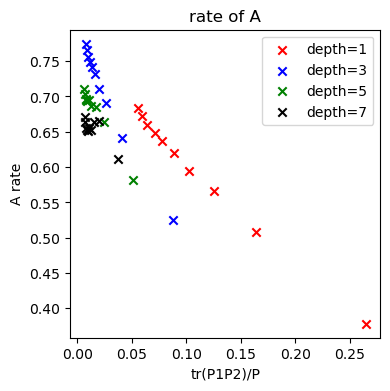

In [220]:
folder_names = ['gp_toy_10x50_tsim0_xsim60_depth1_diff_context',
                'gp_toy_10x50_tsim0_xsim60_depth3_diff_context',
                'gp_toy_10x50_tsim0_xsim60_depth5_diff_context',
                'gp_toy_10x50_tsim0_xsim60_depth7_diff_context']

organizers = [cluster_utils.ClusterResultOrganizer('cluster_results/', batch_name=name, sort_by_key=None) for name in folder_names]

plt.figure(figsize=(4, 4))

colors = ['r', 'b', 'g', 'k']
for i, name in enumerate(folder_names):
    _organizer = organizers[i]

    num_keys, _atau_arr = _organizer.organize_results('A tau', as_arrays=True)
    # num_keys, _mtau_arr = _organizer.organize_results('M tau', as_arrays=True)
    num_keys, _p1p2 = _organizer.organize_results('tr(P1P2)/P', as_arrays=True)
    # num_keys, _v1_v2 = _organizer.organize_results('V1-V2', as_arrays=True)
    plt.scatter(_p1p2.mean(1)[:-1], np.exp(-1/_atau_arr[:-1]), c=colors[i], label=f'depth={_organizer.args.depth}', marker='x')
    # plt.scatter(_p1p2.mean(1)[:-1], np.exp(-1/_mtau_arr[:-1]), label=name, marker='x', c=colors[i])
plt.legend()
plt.xlabel('tr(P1P2)/P')
plt.ylabel('A rate')
plt.title('rate of A')

No key was specified. Automatically using key <<N0context>> to sort the results.
"NSEEDS" found in the arguments. Assuming that each file contains multiple random seeds.
=================== Cluster organizer ===================
11 data objects loaded from folder "gp_toy_10x50_tsim0_xsim60_depth1_diff_context".
For key <<N0context>>, the values are [200, 160, 240, 280, 80, 120, 320, 40, 400, 0, 360]
=================== Cluster organizer ===================
Available data keys are dict_keys(['args', 'train loss', 'test loss', 'train acc', 'test acc', 'train loss naive', 'test loss naive', 'train acc naive', 'test acc naive', 'train magnitude', 'train magnitude naive', 'tr(P1P2)/P', 'V1-V2', 'M tau', 'A tau', 'M asym', 'A asym'])
No key was specified. Automatically using key <<N0context>> to sort the results.
"NSEEDS" found in the arguments. Assuming that each file contains multiple random seeds.
=================== Cluster organizer ===================
11 data objects loaded from folder 

Text(0.5, 0, 'Context embedding dimension')

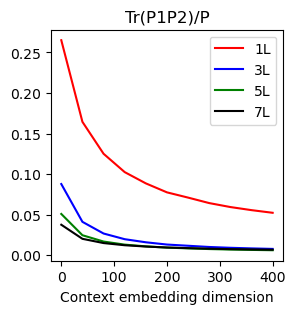

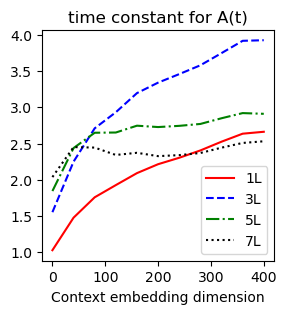

In [224]:
plt.figure(figsize=(3, 3))

labels = ['1L', '3L', '5L', '7L']
colors = ['r', 'b', 'g', 'k']
lines = ['-', '--', '-.', ':']
for i, name in enumerate(folder_names):

    num_keys, _tr_loss = organizers[i].organize_results('tr(P1P2)/P', as_arrays=True)
    plt.plot(num_keys, _tr_loss.mean(1), label=labels[i], c=colors[i])
plt.legend()
plt.xlabel('Context embedding dimension')
plt.title('Tr(P1P2)/P')

plt.figure(figsize=(3, 3))
colors = ['r', 'b', 'g', 'k']
for i, name in enumerate(folder_names):
    _organizer = cluster_utils.ClusterResultOrganizer('cluster_results/', batch_name=name, sort_by_key=None)
    num_keys, _atau = organizers[i].organize_results('A tau', as_arrays=True)
    plt.plot(num_keys, _atau, label=labels[i], c=colors[i], ls=lines[i])
    num_keys, _mtau = organizers[i].organize_results('M tau', as_arrays=True)
    # plt.plot(num_keys, _mtau, label=labels[i], ls='--', c=colors[i])
plt.legend()
plt.title('time constant for A(t)')
plt.xlabel('Context embedding dimension')

No key was specified. Automatically using key <<N0context>> to sort the results.
"NSEEDS" found in the arguments. Assuming that each file contains multiple random seeds.
=================== Cluster organizer ===================
11 data objects loaded from folder "gp_toy_10x50_tsim0_xsim60_depth1_diff_context".
For key <<N0context>>, the values are [200, 160, 240, 280, 80, 120, 320, 40, 400, 0, 360]
=================== Cluster organizer ===================
Available data keys are dict_keys(['args', 'train loss', 'test loss', 'train acc', 'test acc', 'train loss naive', 'test loss naive', 'train acc naive', 'test acc naive', 'train magnitude', 'train magnitude naive', 'tr(P1P2)/P', 'V1-V2', 'M tau', 'A tau', 'M asym', 'A asym'])
No key was specified. Automatically using key <<N0context>> to sort the results.
"NSEEDS" found in the arguments. Assuming that each file contains multiple random seeds.
=================== Cluster organizer ===================
11 data objects loaded from folder 

Text(0.5, 0, 'Context embedding dimension')

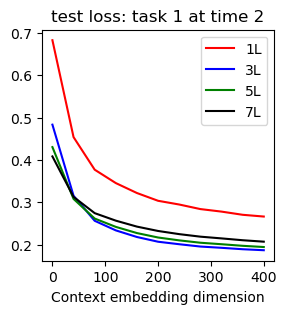

In [219]:
plt.figure(figsize=(3, 3))
colors = ['r', 'b', 'g', 'k']
for i, name in enumerate(folder_names):
    _organizer = cluster_utils.ClusterResultOrganizer('cluster_results/', batch_name=name, sort_by_key=None)
    num_keys, _te_loss = _organizer.organize_results('test loss', as_arrays=True)
    plt.plot(num_keys, _te_loss.mean(1)[:, 0, 1], label=labels[i], c=colors[i])
plt.legend()
plt.title('test loss: task 1 at time 2')
plt.xlabel('Context embedding dimension')




In [31]:
seq_of_train_y.shape

torch.Size([5, 50, 1])

In [19]:
seq_of_train_x, seq_of_test_x, seq_of_train_y, seq_of_test_y =\
        data.prepare_cluster_dataset(num_tasks=5,
                                    train_p=organizer.args.P,
                                    test_p=organizer.args.P_test,
                                    num_clusters=organizer.args.NC,
                                    input_dim=organizer.args.N0,
                                    hidden_dim=organizer.args.Nh,
                                    relative_radius=organizer.args.radius,
                                    teacher_similarity=organizer.args.tsim,
                                    input_similarity=organizer.args.xsim,
                                    accumulate=False,
                                    precision=64)
import time
# now = time.time()
# preds_1, _ = theory.compute_mean_predictions(seq_of_train_x=seq_of_train_x, seq_of_train_y=seq_of_train_y, depth=3, lambda_val=1e6, seq_of_test_x=None, w_var=1.0, fix_weights=True)
# print(time.time() - now)
now = time.time()
preds_1, _ = theory.compute_mean_predictions_old(seq_of_train_x=seq_of_train_x, seq_of_train_y=seq_of_train_y, depth=3, lambda_val=1e6, seq_of_test_x=None,w_var=1.0, use_naive_gp=False, large_lambda=False)
preds_2, _ = theory.compute_mean_predictions(seq_of_train_x=seq_of_train_x, seq_of_train_y=seq_of_train_y, depth=3, lambda_val=1e6, seq_of_test_x=None,w_var=1.0, use_naive_gp=False, large_lambda=True)

print(time.time() - now)

/Users/haozheshan/Dropbox/codes/gp_continual_learning/theory.py:314: UserWarning: arccosine kernel computation is assuming that all inputs have the same norm.
  def arccos_kernel_deep(x1, x2, depth, var1=1, var2=None, covar=None):
100%|██████████| 4/4 [00:00<00:00, 51.65it/s]

0.1281900405883789


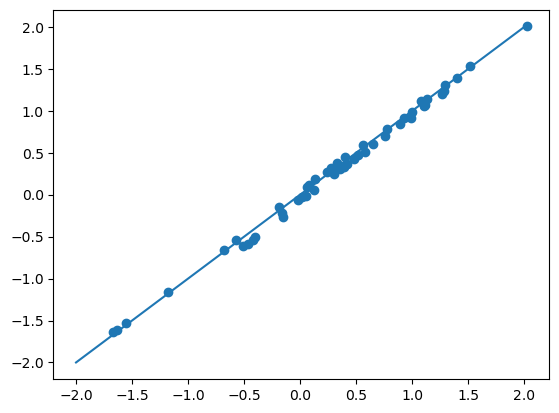

In [20]:
plt.figure()
plt.scatter(preds_1[0, 2], preds_2[0, 2])
plt.plot([-2, 2], [-2, 2])